# Data analysis of Signal Peptides (SPs) 

## 0 Introduction
Inside the cells, the production of mature proteins is achieved through transcription, translation, and modification. However, this process takes place mainly inside the cytosol of the cell, thus thetransportation of proteins into specific areas is facilitated by  short amino acid sequences known as signal peptides. Signal peptides enable intra- and extra- cellular localization of the peptides where after they release the protein sequence to facilitate mature protein formation. 

In general, signal peptides are composed of 15 to 30 amino acids and are located at the N-terminus of the peptide sequence. Besides this, they contain three main regions which are the polar N-region that is used for recognition of signal peptides, hydrophobic H-region which regulates folding of the protein and  transportation across cellular membranes, and C-region which acts as a cleavage site for releasing the mature protein. 

Localization of mature proteins within a cell plays an important role for the regulation of cellular functions. Hence, formation of signal peptide defects can lead to fatal consequences as it cause mislocalization and misfoldeding of proteins within the cell. Besides cellular functions, signal peptides also have substantial importance at regulating the secretion of intracellular proteins such as enzymes, thus making them a valuable mediator for the optimization of industrial fermentation processes. 

Despite their importance, the territory of signal peptides are poorly investigated. This, in part, is due to the need of high prediction power required to cover the combinatorial space of amino acid combinations. For instance, an average-sized signal peptide with 20 amino acids would require consideration of 10^25 potential combinations. However, with the increasing adoption of industrial bioprocesses and development of new approaches such as literate programming and high-throughput analysis, there is an emerging curiousity and competence to investigate potential optimization approaches in signal peptides. 

Hence, motivation of this project is to use machine learning simulations for capturing the important features of singal peptides which can be used for simulation-guided engineering to achieve improved performance and efficiency. Hence, this notebook is dedicated to carry out data analysis in order to process and make the experimental data ready to be used in machine learning simulations so that the underlying features can be captured and used for the engineering of signal peptides.

As a final note, to develop a sense of guidence through the entire process, the project is dedicated to answer the following research questions:

1.	Can we use machine learning simulations to design novel signal peptides for Aspergillus oryzae?

2.	Can we use simulation-guided optimization to outperform the native signal peptides?

3. 	Can we use literate programming and high-throughput technologies to achieve an efficienc experimental design?

### Agenda
- Analyze and summarize statistics of peptide abundancecs from the proteomics data
- Compare proteomics and SignalP outputs to determine the common/unique signal peptides
- Visualize peptide abundance differences between different media compositions (Minimal vs Minimal + Nitrogen) and signal peptide results (Proteomics vs SignalP) 

In [1]:
# Import packages needed for the notebook
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
import pandas as pd
import numpy as np
import math

## 1 Data

### 1.1 Proteomics data
Here we load the proteomics analysis results as dataframe, which consist of peptide sequence analysis of supernatants obtained from Aspergillus samples that are grown under two different minimum media compositions (minimum media and minimum media with additional nitrogen). Each media composition was tested with three samples and the supernatants of each sample were analyzed through mass spectrometry, thus yielding the proteomics dataframe. The dataframe consist of several columns which are not necessary for the data anaylsis. Hence, we have to isolate the important features that are needed for analysis purposes, which consist of:

- Accession: Unique identifier that is assigned to the signal peptide sequence 
- Abundace: Raw signal peptide counts that are observed and recorded directly from mass spectrometry analysis 
- Abundances (Scaled): Scaled version of raw singal peptide counts signal peptide counts that are observed from mass spectrometry analysis 
- Abundances (Normalized): Normalized version of raw singal peptide counts signal peptide counts that are observed from mass spectrometry analysis 

As an initial processing step, we removed RFP_Fusion (Red Fluorescent Protein) as this has no valuable information to provide for the project.

In [2]:
# Read the Excel file into a pandas dataframe 
df_proteomics = pd.read_excel('../Data/03_Proteomics_data/20221124_FJ_E1200_MWN_15cm_140min_500ng_#1572_proteins.xlsx')
df_proteomics = df_proteomics[df_proteomics.Accession != 'RFP_Fusion'] # Remove RFP_Fusion from the dataframe
df_proteomics

,Checked,Protein FDR Confidence: Combined,Master,Accession,Description,Exp. q-value: Combined,Sum PEP Score,Coverage [%],# Peptides,# PSMs,...,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106
0,False,High,Master Protein,AO090003000935-T-p1,transcript=AO090003000935-T | gene=AO090003000...,0.000,599.687,89,31,7127,...,NaN,Minimal medium,NaN,NaN,NaN,NaN,Minimal medium,NaN,NaN,NaN
1,False,High,Master Protein,AO090023000944-T-p1,transcript=AO090023000944-T | gene=AO090023000...,0.000,523.784,68,32,3237,...,NaN,NaN,Sample 1,4.740753e+07,7.385813e+08,NaN,NaN,Raw,3.083450e+07,1.934537e+06
2,False,High,Master Protein,AO090003001591-T-p1,transcript=AO090003001591-T | gene=AO090003001...,0.000,519.742,68,33,2987,...,NaN,NaN,Sample 2,4.286160e+07,6.545026e+08,NaN,NaN,Scaled,4.676862e+01,5.097854e+00
4,False,High,Master Protein,AO090005001300-T-p1,transcript=AO090005001300-T | gene=AO090005001...,0.000,384.472,90,45,554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,High,Master Protein,AO090010000746-T-p1,transcript=AO090010000746-T | gene=AO090010000...,0.000,346.325,82,37,546,...,NaN,Minimal medium + Nitrogen,NaN,NaN,NaN,NaN,Minimal medium + Nitrogen,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,False,Medium,Master Protein,AO090001000075-T-p1,transcript=AO090001000075-T | gene=AO090001000...,0.044,1.795,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862,False,Medium,Master Protein,AO090005001355-T-p1,transcript=AO090005001355-T | gene=AO090005001...,0.046,1.790,14,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,False,Medium,Master Protein,AO090003000247-T-p1,transcript=AO090003000247-T | gene=AO090003000...,0.047,1.779,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,False,Medium,Master Protein,AO090001000680-T-p1,transcript=AO090001000680-T | gene=AO090001000...,0.048,1.774,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 SignalP data

Before describing this section, I would like to credit and emphasize my gratitude to my supervisor Lucas Levassor who took responsibilty to generte the SignalP predictions.

SignalP is an algorithm developed in DTU which predicts the presence and location of signal peptide cleavage sites in amino acid sequences through analyzing the annotated protein profile of a specific organism. Hence, we used SignalP predictions to obtain in silico prediction of potential signal peptide sequences that might be produced by the Aspergillus oryzae.

In [3]:
# Read the Excel file into a pandas dataframe
df_signalP = pd.read_excel('../Data/01_SignalP_output/sigpep_predict.xlsx')
df_signalP

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0,23,0.999803,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029-T-p1,0,23,0.999835,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042-T-p1,0,23,0.999843,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053-T-p1,0,41,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0,18,0.999821,MHLQATLAVGLSLLGLTL
...,...,...,...,...,...
1056,AO090103000483-T-p1,0,19,0.833106,MKTSFLLAAIGFLYRLPCS
1057,AO090103000487-T-p1,0,19,0.999710,MTRYLSFLFLLILFGNSVF
1058,AO090103000493-T-p1,0,17,0.999791,MRGIVALSFLSVALGVT
1059,AO090701000994-T-p1,0,18,0.999845,MRLLLIAPLFSAVSYGAQ


## 2 Statistical analysis of Proteomics data
Here we carried out statistical analysis of two minimum media types to investigate the influcence of different compositions. More specifically, we used "Scaled" and "Raw" abundance values to calculate mean, mean of means, standard deviation and standard error to compare the outcomes of the samples within the same media composition as well as between two media compositions. In addition, we will also normalize the distribution of the "Scaled" and "Raw" datasets in order to prepare them for machine learning operations.

The "Scaled" and "Raw" abundace samples can be distinguished with the column names:
- Sample: 1 (F16), 2 (F17), and 3 (F18)   = Minimum media (MM)
- Sample 13 (F28), 14 (F29), and 15 (F30) = Minimum meadia with more Nitrogen (MM_N) 

Hence, in order to make correct seelction, we will create a boolean mask which will allow us to select dataframe variables according to specific characters they contain in the dataframe such as using "Scaled" to select scaled abundances and "Abundance" to select raw abundances.

Once the sta statistical analysis are complete, we will generate bar plots in order to illustrate the comparion between samples and media compositions.

In [4]:
# Create a boolean mask that is True for columns that contain "Scaled" and "F16", "F17", or "F18"
MM_scaled_mask = df_proteomics.columns.str.contains('Scaled', 'Abundance') & df_proteomics.columns.str.contains('F16|F17|F18', regex=True)
MM_N_scaled_mask = df_proteomics.columns.str.contains('Scaled', 'Abundance') & df_proteomics.columns.str.contains('F28|F29|F30', regex=True)

# Create a boolean mask that is True for columns that contain "Abundance" and "F16", "F17", or "F18"
MM_raw_mask = df_proteomics.columns.str.contains('Abundance:') & df_proteomics.columns.str.contains('F16|F17|F18', regex=True)
MM_N_raw_mask = df_proteomics.columns.str.contains('Abundance:') & df_proteomics.columns.str.contains('F28|F29|F30', regex=True)

# Use the mask to select the columns you are interested
MM_scaled = df_proteomics.loc[:,MM_scaled_mask]
MM_N_scaled = df_proteomics.loc[:,MM_N_scaled_mask]
MM_raw = df_proteomics.loc[:,MM_raw_mask]
MM_N_raw = df_proteomics.loc[:,MM_N_raw_mask]
MM_scaled

,"Abundances (Scaled): F16: Sample, 1","Abundances (Scaled): F17: Sample, 2","Abundances (Scaled): F18: Sample, 3"
0,5.4,4.3,7.4
1,242.7,250.1,258.5
2,231.8,214.1,244.3
4,96.3,38.4,17.0
5,98.6,105.3,113.0
...,...,...,...
861,201.7,18.7,NaN
862,64.6,146.2,NaN
863,NaN,NaN,NaN
864,NaN,NaN,NaN


In [5]:
# Calculate mean abundances per Accession by using the abundances
MM_scaled_means = df_proteomics['MM mean abundances (Scaled)'] = MM_scaled.mean(axis=1)
MM_N_scaled_means = df_proteomics['MM + Nitrogen mean abundances (Scaled)'] = MM_N_scaled.mean(axis=1)
MM_raw_means = df_proteomics['MM mean abundances (Raw)'] = MM_raw.mean(axis=1)
MM_N_raw_means = df_proteomics['MM + Nitrogen mean abundances (Raw)'] = MM_N_raw.mean(axis=1)

In [6]:
# Calculate mean of the means abundances per Accession by using the abundances
MM_scaled_mean_of_means = MM_scaled_means.mean()
MM_N_scaled_mean_of_means = MM_N_scaled_means.mean()
MM_raw_mean_of_means = MM_raw_means.mean()
MM_N_raw_mean_of_means = MM_N_raw_means.mean()

In [7]:
# Calculate the standard deviation between the means of the 3 samples in the same media composition
MM_scaled_std_dev = (MM_scaled_means).std()
MM_N_scaled_std_dev = (MM_N_scaled_means).std()
MM_raw_std_dev = (MM_raw_means).std()
MM_N_raw_std_dev = (MM_N_raw_means).std()

### 2.1 Normalization of datasets

In this case we applied Min-Max normalization, which basically scale the peptide abundances within a specific range, in this case between 0 and 1 by subtracting the individual variables from the minimum value observed and then dividing by the range (i.e., the difference between the maximum and minimum values). 

In [8]:
# Apply Min-Max normalization 
MM_scaled_norm = (MM_scaled - MM_scaled.min()) / (MM_scaled.max() - MM_scaled.min())
MM_N_scaled_norm = (MM_N_scaled - MM_N_scaled.min()) / (MM_N_scaled.max() - MM_N_scaled.min())
MM_raw_norm = (MM_raw - MM_raw.min()) / (MM_raw.max() - MM_raw.min())
MM_N_raw_norm = (MM_N_raw - MM_N_raw.min()) / (MM_N_raw.max() - MM_N_raw.min())

In [9]:
# Calculate mean of "Scaled + Normalized" and "Raw + Normalized" abundances per Accession
df_proteomics['MM mean abundances (Scaled-Normalized)'] = MM_N_scaled_norm.mean(axis=1)
df_proteomics['MM + Nitrogen mean abundances (Scaled-Normalized)'] = MM_N_scaled_norm.mean(axis=1)
df_proteomics['MM mean abundances (Raw-Normalized)'] = MM_raw_norm.mean(axis=1)
df_proteomics['MM + Nitrogen mean abundances (Raw-Normalized)'] = MM_N_raw_norm.mean(axis=1)

### 2.2 Results of statistical analysis

In [10]:
# Print dataframe of "Scaled" and "Raw" mean abundances per Accession
df_abundance_means = df_proteomics.loc[:, ['Accession', 'MM mean abundances (Scaled)', 'MM + Nitrogen mean abundances (Scaled)', 'MM mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw)']] 
df_abundance_means

,Accession,MM mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled),MM mean abundances (Raw),MM + Nitrogen mean abundances (Raw)
0,AO090003000935-T-p1,5.700000,64.833333,1.066262e+08,1.494872e+09
1,AO090023000944-T-p1,250.433333,53.733333,2.632887e+08,7.327970e+07
2,AO090003001591-T-p1,230.066667,69.166667,1.047763e+10,4.066686e+09
4,AO090005001300-T-p1,50.566667,94.433333,3.997800e+07,9.707511e+07
5,AO090010000746-T-p1,105.633333,264.400000,2.719032e+08,8.634503e+08
...,...,...,...,...,...
861,AO090001000075-T-p1,110.200000,310.600000,1.013201e+05,3.909362e+05
862,AO090005001355-T-p1,105.400000,184.200000,3.984604e+04,9.575187e+04
863,AO090003000247-T-p1,NaN,NaN,NaN,NaN
864,AO090001000680-T-p1,NaN,389.333333,NaN,9.818556e+04


In [11]:
# Print dataframe of normalized mean abundances per Accession
df_abundance_means_normalized = df_proteomics.loc[:, ['Accession', 'MM mean abundances (Scaled-Normalized)', 'MM + Nitrogen mean abundances (Scaled-Normalized)', 'MM mean abundances (Raw-Normalized)', 'MM + Nitrogen mean abundances (Raw-Normalized)']]
df_abundance_means_normalized 

,Accession,MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935-T-p1,0.059285,0.059285,0.010224,0.417923
1,AO090023000944-T-p1,0.044270,0.044270,0.025062,0.017628
2,AO090003001591-T-p1,0.058537,0.058537,1.000000,1.000000
4,AO090005001300-T-p1,0.080759,0.080759,0.003882,0.024045
5,AO090010000746-T-p1,0.228295,0.228295,0.025872,0.218331
...,...,...,...,...,...
861,AO090001000075-T-p1,0.254802,0.254802,0.000010,0.000090
862,AO090005001355-T-p1,0.122683,0.122683,0.000003,0.000015
863,AO090003000247-T-p1,NaN,NaN,NaN,NaN
864,AO090001000680-T-p1,0.309596,0.309596,NaN,0.000019


In [12]:
# Merge and print dataframes of mean abundances per Accession before and after normalization
df_merged_abundance_means = pd.merge(df_abundance_means, df_abundance_means_normalized, on='Accession')

# Select and print the desired parameters
df_merged_abundance_means = df_merged_abundance_means[['Accession', 
'MM mean abundances (Scaled)', 'MM mean abundances (Scaled-Normalized)', 
'MM + Nitrogen mean abundances (Scaled)', 'MM + Nitrogen mean abundances (Scaled-Normalized)', 
'MM mean abundances (Raw)', 'MM mean abundances (Raw-Normalized)',
'MM + Nitrogen mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw-Normalized)']]

df_merged_abundance_means

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935-T-p1,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923
1,AO090023000944-T-p1,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628
2,AO090003001591-T-p1,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000
3,AO090005001300-T-p1,50.566667,0.080759,94.433333,0.080759,3.997800e+07,0.003882,9.707511e+07,0.024045
4,AO090010000746-T-p1,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331
...,...,...,...,...,...,...,...,...,...
860,AO090001000075-T-p1,110.200000,0.254802,310.600000,0.254802,1.013201e+05,0.000010,3.909362e+05,0.000090
861,AO090005001355-T-p1,105.400000,0.122683,184.200000,0.122683,3.984604e+04,0.000003,9.575187e+04,0.000015
862,AO090003000247-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,AO090001000680-T-p1,NaN,0.309596,389.333333,0.309596,NaN,NaN,9.818556e+04,0.000019


In [14]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_merged_abundance_means.to_csv('../Data/04_Data_analysis_signal_peptides/proteomics_mean_peptide_abundances.csv', index=False)

### 2.3 Visualization of statistical analysis

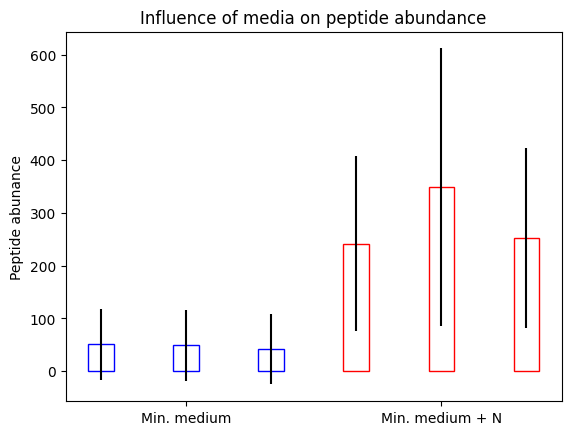

In [15]:
# Set width of each bar
bar_width = 0.3

# Plot the first set of bars
plt.bar(MM_scaled.columns, MM_scaled.mean(), bar_width, yerr=MM_scaled.std(), color='none', edgecolor='blue', label='MM_N_scaled_mask')

# Increment x-coordinates for the next set of bars
x_coords = np.arange(len(MM_N_scaled_mask)) + bar_width

# Plot the second set of bars
plt.bar(MM_N_scaled.columns, MM_N_scaled.mean(), bar_width, yerr=MM_N_scaled.std(), color='none', edgecolor='red', label='MM_N_scaled_mask')

# Set plot parameters
plt.title('Influence of media on peptide abundance')
x_ticks = ['Min. medium', 'Min. medium + N']
plt.xticks([1, 4], x_ticks)
plt.ylabel('Peptide abunance')


plt.show()

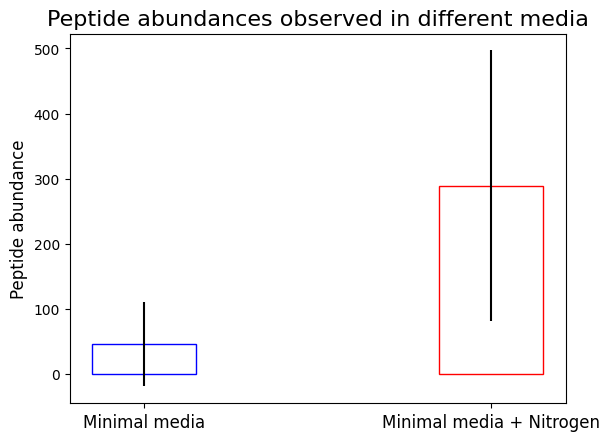

In [16]:
# Set width of each bar
bar_width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(1, MM_scaled_mean_of_means, bar_width, yerr=MM_scaled_std_dev, 
                color='none', edgecolor='blue', label='MM_scaled')
rects2 = ax.bar(2, MM_N_scaled_mean_of_means, bar_width, yerr=MM_N_scaled_std_dev, 
                color='none', edgecolor='red', label='MM_N_scaled')

# Set plot parameters
ax.set_title('Peptide abundances observed in different media', fontsize = 16)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Minimal media', 'Minimal media + Nitrogen'], fontsize = 12)
ax.set_ylabel('Peptide abundance', fontsize  = 12)
ax.xaxis.set_ticks
ax.legend().set_visible(False)

plt.show()

## 3 Comparison of Proteomics and SignalP data
The main focus of this section is to cross-reference signal peptides predicted by signalP algorithm with the proteomics results and generate a dataframe with specific parameters such as:
- Accession
- Mean peptide abundances
- Peptide sequence
- Signal peptide likelyhood

By doing this, we are aiming to identify and isolate signal peptides that are common (located in both proteomics and signalP) and unique (located only in signalP). The resulting set of signal peptides than can be ready to use for machine learning operations, where the common signal peptide set will carry the significant features desired to be captured, and unique signal peptide set will carry the insignificant features to be avoided.

In [17]:
# Reset the index of the dataframe (df_signalp) and save as processed dataframe (df_signalpp)
df_signalPP = df_signalP.reset_index()
# Change the name of the "gene" in the df_signalp dataframe into "Accession" in the df_signalpp
# This will allow us to merge the df_proteomics and df_singalpp on a specific parameter such as "Accession"
df_signalPP = df_signalP.rename(columns={'gene': 'Accession', 'sequence': 'Peptide sequences', 'signal_peptide_likelyhood': 'Propability for correct peptide identification'})
# 'Propability for correct peptide identification' --> Shows the likelihood of having the sequence being cut at final amino acid location shown on the 'Peptide sequences'

# Merge the dataframes (df_proteomics and df_singalpp)
# The resulting dataframe(df_merged_prosig) contains only the variables matching among the two dataframes
df_merged_proteomics_signalP = pd.merge(df_merged_abundance_means, df_signalPP, on='Accession')

# Select and print the desired parameters
df_merged_proteomics_signalPP = df_merged_proteomics_signalP[['Accession',  
'MM mean abundances (Scaled)', 'MM mean abundances (Scaled-Normalized)', 
'MM + Nitrogen mean abundances (Scaled)', 'MM + Nitrogen mean abundances (Scaled-Normalized)', 
'MM mean abundances (Raw)', 'MM mean abundances (Raw-Normalized)',
'MM + Nitrogen mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw-Normalized)', 
'Peptide sequences', 'Propability for correct peptide identification']]
df_merged_proteomics_signalPP

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),Peptide sequences,Propability for correct peptide identification
0,AO090003000935-T-p1,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,MEAFNLHNFLSSLYILLPFVILANPVH,0.999834
1,AO090023000944-T-p1,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628,MMVAWWSLFLYGLQVAAPAL,0.999845
2,AO090003001591-T-p1,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,MMVAWWSLFLYGLQVAAPAL,0.999866
3,AO090010000746-T-p1,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,MVSFSSCLRALALGSSVLAVQPVL,0.999747
4,AO090026000003-T-p1,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,MAVRIARFLGLSTVAYLALANGID,0.848574
...,...,...,...,...,...,...,...,...,...,...,...
251,AO090020000279-T-p1,NaN,0.092233,105.500000,0.092233,NaN,NaN,1.733149e+05,0.000044,MKVQHLSSPFLLFLLPAIAT,0.999775
252,AO090011000174-T-p1,NaN,0.310975,364.966667,0.310975,NaN,NaN,2.159021e+05,0.000049,MQLLPVALLLGALAAPTA,0.999818
253,AO090023000365-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MRDFLSLLGLASIIASSS,0.999822
254,AO090010000562-T-p1,80.633333,0.045944,57.833333,0.045944,5.244993e+04,0.000005,4.827228e+04,0.000009,MILGLIASLGQAAVAA,0.999807


In [18]:
# Reset the index of the dataframe (df_signalp) and save as processed dataframe (df_signalpp)
df_signalPP = df_signalP.reset_index()

# Change the name of the "gene" in the df_signalp dataframe into "Accession" in the df_signalpp
df_signalPP = df_signalP.rename(columns={'gene': 'Accession', 'sequence': 'Peptide sequences', 'signal_peptide_likelyhood': 'Propability for correct peptide identification'})

# Merge the dataframes to include only the variables matching among the two dataframes
df_common_peptides_signalP = pd.merge(df_merged_abundance_means, df_signalPP, on='Accession')

# Create a new column that sorts the accession in a descending order to abundances observed in the raw data column
df_common_peptides_signalP['max_abundance'] = df_common_peptides_signalP[['MM mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw)']].max(axis=1)
df_common_peptides_signalPP = df_common_peptides_signalP.sort_values(by='max_abundance', ascending=False)

df_common_peptides_signalPP

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),start_pos,end_pos,Propability for correct peptide identification,Peptide sequences,max_abundance
2,AO090003001591-T-p1,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,0,20,0.999866,MMVAWWSLFLYGLQVAAPAL,1.047763e+10
0,AO090003000935-T-p1,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,0,27,0.999834,MEAFNLHNFLSSLYILLPFVILANPVH,1.494872e+09
17,AO090103000076-T-p1,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,0,18,0.999835,MLRVSAIFMACLLLATAA,1.202415e+09
4,AO090026000003-T-p1,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,0,24,0.848574,MAVRIARFLGLSTVAYLALANGID,1.061096e+09
3,AO090010000746-T-p1,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,0,24,0.999747,MVSFSSCLRALALGSSVLAVQPVL,8.634503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,AO090120000056-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,68,0.505236,MPMPCRTQRYKYCFTVIVCLPYLHLTNFGYLKTNIIPHFSNPNHNS...,NaN
216,AO090701000844-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,24,0.999802,MHILTPPRLCTALTVLTSLIISSF,NaN
225,AO090009000017-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,0.999745,MMTKLWMIFGCMAAAFSTAT,NaN
237,AO090026000198-T-p1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,18,0.999847,MRFGYALAGILISIAGAN,NaN


In [ ]:
# Fill any NaN values with 0
df_common_peptides_signalPP_wo_NaN = df_common_peptides_signalPP.fillna(0)
df_common_peptides_signalPP_wo_NaN

In [ ]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_common_peptides_signalPP_wo_NaN.to_csv('../Data/04_Data_analysis_signal_peptides/signalP_common_peptides_wo_NaN.csv', index=False)

### 3.1 Visualization of Proteomics SignalP comparison

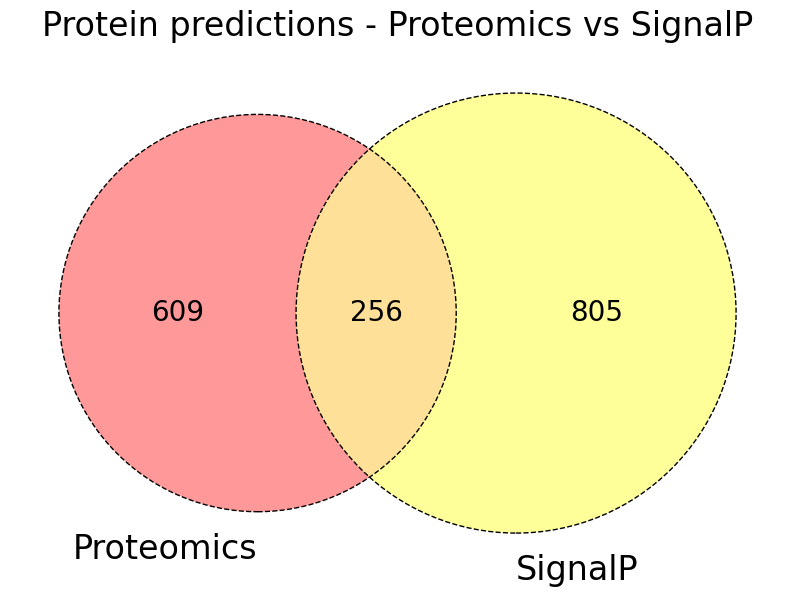

In [19]:
#  Create the subsets
df_proteomics_acc = set(df_proteomics['Accession'])
df_signalPP_acc = set(df_signalPP['Accession'])

# Set the font size before creating any plot elements
plt.rc('font', size=20)

# Create the Venn diagram
subsets = [df_proteomics_acc, df_signalPP_acc]
v = venn2(subsets, set_labels=('Proteomics', 'SignalP'), set_colors=('red', 'yellow'))
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Protein predictions - Proteomics vs SignalP")
plt.gcf().set_size_inches(10, 8)
plt.show()

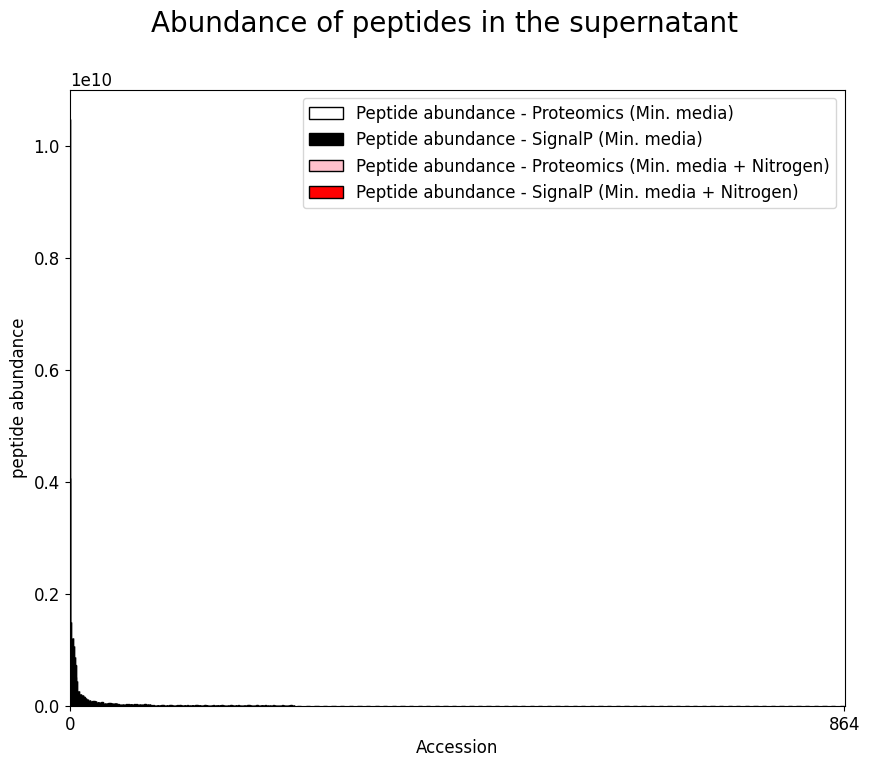

In [20]:
# Rename the "# Peptides" column to indicate which excel file it comes from
df_peptide_count_proteomics = df_merged_abundance_means.rename(columns={'MM mean abundances (Raw)': 'Peptide abundance - Proteomics (Min. media)', 'MM + Nitrogen mean abundances (Raw)': 'Peptide abundance - Proteomics (Min. media + Nitrogen)'})
df_peptide_count_signalP = df_common_peptides_signalPP.rename(columns={'MM mean abundances (Raw)': 'Peptide abundance - SignalP (Min. media)', 'MM + Nitrogen mean abundances (Raw)': 'Peptide abundance - SignalP (Min. media + Nitrogen)'})

# Merge the dataframes on the "Accession" column
df_peptide_count_merged_all = pd.merge(df_peptide_count_proteomics, df_peptide_count_signalP, on='Accession', how='outer')

# Fill any NaN values with 0
df_peptide_count_merged_all = df_peptide_count_merged_all.fillna(0)

# Sort the dataframe by peptide abundances in descending order
all_bars = ['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)', 'Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)']
#df_peptide_count_merged_all['total_abundance'] = df_peptide_count_merged_all[all_bars].sum(axis=1)
df_peptide_count_merged_all['max_abundance'] = df_peptide_count_merged_all[all_bars].max(axis=1)
df_peptide_count_merged_max = df_peptide_count_merged_all.sort_values(by=['max_abundance'], ascending=False)

# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Generate the bar plot
df_peptide_count_merged_max.plot(x='Accession', y=all_bars, kind='bar', color=['none', 'black', 'pink', 'red'], edgecolor='black')

ax = plt.gca()
ax.set_xticks([0, df_peptide_count_merged_max.index.get_loc(df_peptide_count_merged_max.index[-1])])
ax.set_xticklabels([0, df_peptide_count_merged_max.index.get_loc(df_peptide_count_merged_max.index[-1])], rotation=0)
ax.figure.suptitle('Abundance of peptides in the supernatant', fontsize=20)
ax.figure.set_size_inches(10, 8)

plt.xlabel('Accession')
plt.ylabel('peptide abundance')
plt.show()

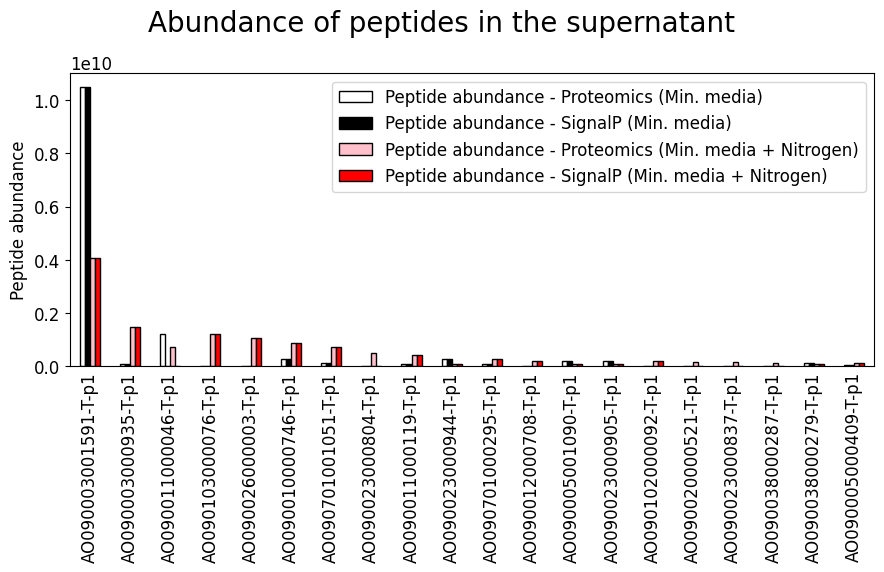

In [21]:
# If you want to plot the entire chunks, change figure size to "figsize=(10, n*5)", enumaration to "enumerate(df_chunks)" and set "df_chunks_all_media[:1]" to 2

# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Split the dataframe into chunks based on the number of subplots desired
chunk_size = 20  # Adjust this Accesssion value as needed
n = math.ceil(len(df_peptide_count_merged_max) / chunk_size)
df_chunks_all_media = [df_peptide_count_merged_max[i:i+chunk_size] for i in range(0, len(df_peptide_count_merged_all), chunk_size)]

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 9))
fig.delaxes(axes[1]) # Delete second axis (remove to make remaining chunks available)
fig.suptitle('Abundance of peptides in the supernatant', fontsize=20)
all_bars = ['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)', 'Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)']

# Plot each chunk in a separate subplot
for i, df_chunk in enumerate(df_chunks_all_media[:1]):
    ax = axes[i]
    df_chunk.plot(x='Accession', y=all_bars, kind='bar', color=['none', 'black', 'pink', 'red'], edgecolor='black', ax=ax)
    ax.set_ylim(0, 1.1e10)
    ax.set_xlabel('')
    ax.set_ylabel('Peptide abundance')
    ax.grid(visible=False)  # Remove the gridlines
    ax.tick_params(axis='x', which='both', length=0)  # Remove the x-axis tick labels and ticks

plt.tight_layout()

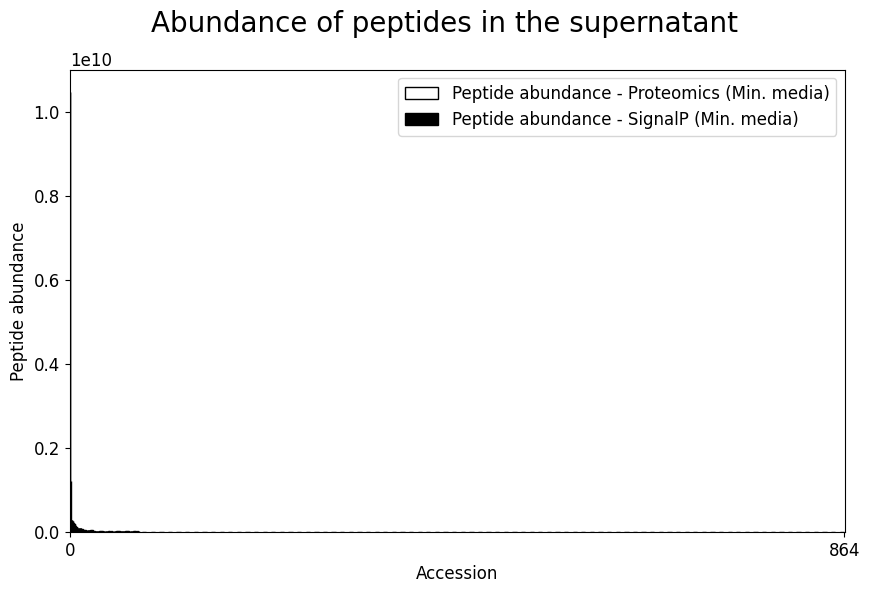

In [22]:
# Rename the "# Peptides" column to indicate which excel file it comes from
df_peptide_count_proteomics = df_merged_abundance_means.rename(columns={'MM mean abundances (Raw)': 'Peptide abundance - Proteomics (Min. media)'})
df_peptide_count_signalP = df_common_peptides_signalPP.rename(columns={'MM mean abundances (Raw)': 'Peptide abundance - SignalP (Min. media)'})

# Merge the dataframes on the "Accession" column
df_peptide_count_merged_MM = pd.merge(df_peptide_count_proteomics, df_peptide_count_signalP, on='Accession', how='outer')

# Fill any NaN values with 0
df_peptide_count_merged_MM = df_peptide_count_merged_MM.fillna(0)

# Sort the dataframe by peptide abundances in descending order
all_bars = ['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)']
df_peptide_count_merged_MM = df_peptide_count_merged_MM.sort_values(by=all_bars, ascending=False)

# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Generate the bar plot
df_peptide_count_merged_MM.plot(x='Accession', y=all_bars, kind='bar', color=['none', 'black'], edgecolor='black')

ax = plt.gca()
ax.set_xticks([0, df_peptide_count_merged_MM.index.get_loc(df_peptide_count_merged_MM.index[-1])])
ax.set_xticklabels([0, df_peptide_count_merged_MM.index.get_loc(df_peptide_count_merged_MM.index[-1])], rotation=0)
ax.figure.suptitle('Abundance of peptides in the supernatant', fontsize=20)
ax.figure.set_size_inches(10, 6)

plt.xlabel('Accession')
plt.ylabel('Peptide abundance')
plt.show()

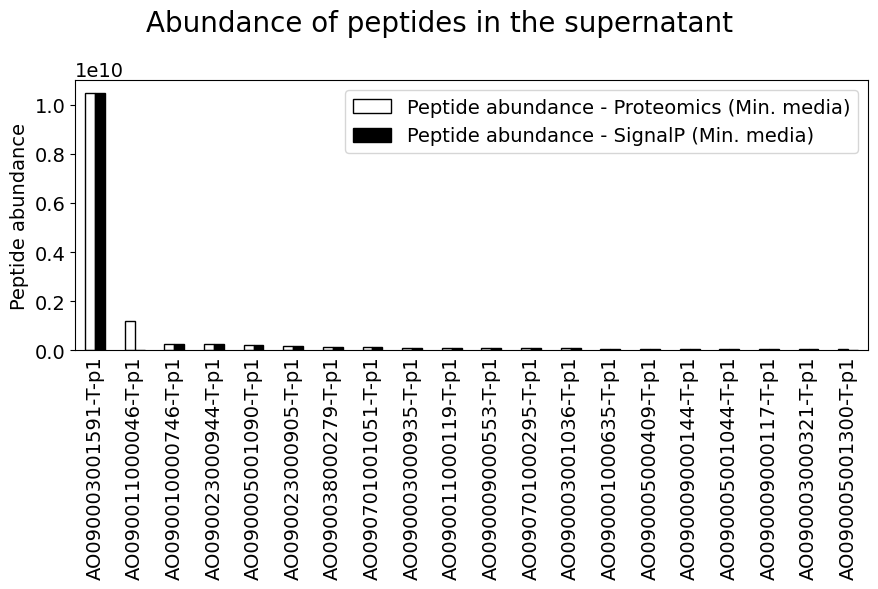

In [23]:
# If you want to plot the entire chunks, change figure size to "figsize=(10, n*5)", enumaration to "enumerate(df_chunks)", and set "df_chunks_MM[:1]" to 2

# Set the font size before creating any plot elements
plt.rc('font', size=14)

# Split the dataframe into chunks based on the number of subplots desired
chunk_size = 20  # Adjust this Accesssion value as needed
n = math.ceil(len(df_peptide_count_merged_MM) / chunk_size)
df_chunks_MM = [df_peptide_count_merged_MM[i:i+chunk_size] for i in range(0, len(df_peptide_count_merged_MM), chunk_size)]

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 9))
fig.delaxes(axes[1]) # Delete second axis (remove to make remaining chunks available)
fig.suptitle('Abundance of peptides in the supernatant', fontsize=20)

# Plot each chunk in a separate subplot
for i, df_chunk in enumerate(df_chunks_MM[:1]):
    ax = axes[i]
    df_chunk.plot(x='Accession', y=['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)'], kind='bar', color=['none', 'black'], edgecolor='black', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Peptide abundance')
    ax.set_ylim(0, 1.1e10)
    ax.grid(visible=False)  # Remove the gridlines
    ax.tick_params(axis='x', which='both', length=0)  # Remove the x-axis tick labels and ticks

plt.tight_layout()

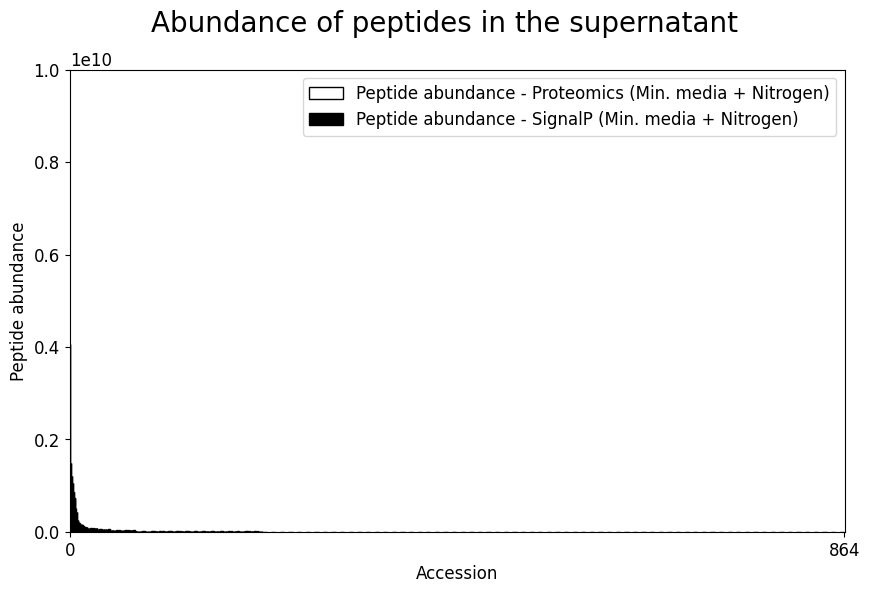

In [24]:
# Rename the "# Peptides" column to indicate which excel file it comes from
df_peptide_count_proteomics = df_peptide_count_proteomics.rename(columns={'MM + Nitrogen mean abundances (Raw)': 'Peptide abundance - Proteomics (Min. media + Nitrogen)'})
df_peptide_count_signalP = df_peptide_count_signalP.rename(columns={'MM + Nitrogen mean abundances (Raw)': 'Peptide abundance - SignalP (Min. media + Nitrogen)'})

# Merge the dataframes on the "Accession" column
df_peptide_count_merged_MM_N = pd.merge(df_peptide_count_proteomics, df_peptide_count_signalP, on='Accession', how='outer')

# Fill any NaN values with 0
df_peptide_count_merged_MM_N = df_peptide_count_merged_MM_N.fillna(0)

# Sort the dataframe by peptide abundances in descending order
all_bars = ['Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)']
df_peptide_count_merged_MM_N = df_peptide_count_merged_MM_N.sort_values(by=all_bars, ascending=False)

# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Generate the bar plot
df_peptide_count_merged_MM_N.plot(x='Accession', y=all_bars, kind='bar', color=['none', 'black'], edgecolor='black')
ax = plt.gca()
ax.set_xticks([0, df_peptide_count_merged_MM_N.index.get_loc(df_peptide_count_merged_MM_N.index[-1])])
ax.set_xticklabels([0, df_peptide_count_merged_MM_N.index.get_loc(df_peptide_count_merged_MM_N.index[-1])], rotation=0)
ax.figure.suptitle('Abundance of peptides in the supernatant', fontsize=20)
ax.figure.set_size_inches(10, 6)

plt.ylim(0, 1e10)
plt.xlabel('Accession')
plt.ylabel('Peptide abundance')
plt.show()

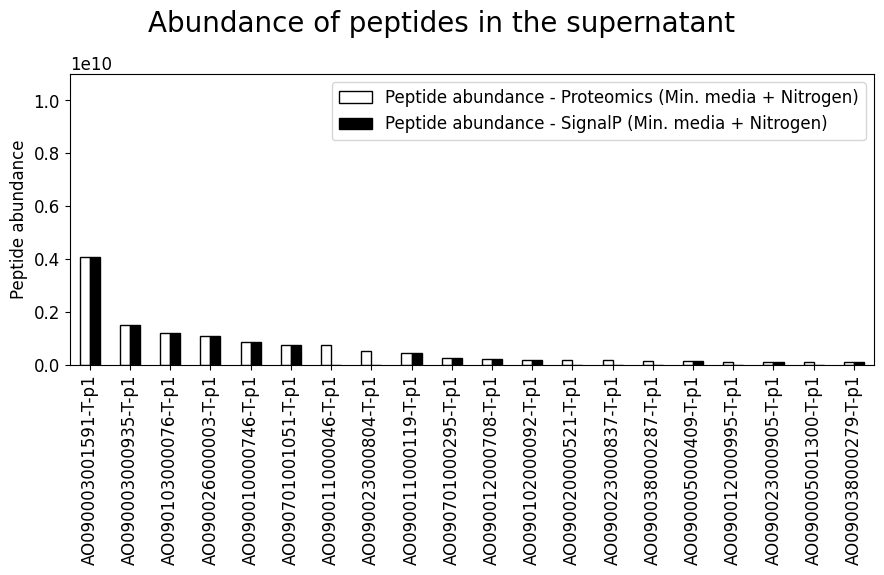

In [25]:
# If you want to plot the entire chunks, change figure size to "figsize=(10, n*5)", enumaration to "enumerate(df_chunks)" and set "df_chunks_MM_N[:1]" to 2

# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Split the dataframe into chunks based on the number of subplots desired
chunk_size = 20  # Adjust this Accesssion value as needed
n = math.ceil(len(df_peptide_count_merged_MM_N) / chunk_size)
df_chunks_MM_N = [df_peptide_count_merged_MM_N[i:i+chunk_size] for i in range(0, len(df_peptide_count_merged_MM_N), chunk_size)]

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 9))
fig.delaxes(axes[1]) # Delete second axis (remove to make remaining chunks available)
fig.suptitle('Abundance of peptides in the supernatant', fontsize=20)

# Plot each chunk in a separate subplot
for i, df_chunk in enumerate(df_chunks_MM_N[:1]):
    ax = axes[i]
    df_chunk.plot(x='Accession', y=['Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)'], kind='bar', color=['none', 'black'], edgecolor='black', ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Peptide abundance')
    ax.set_ylim(0, 1.1e10)

plt.tight_layout()

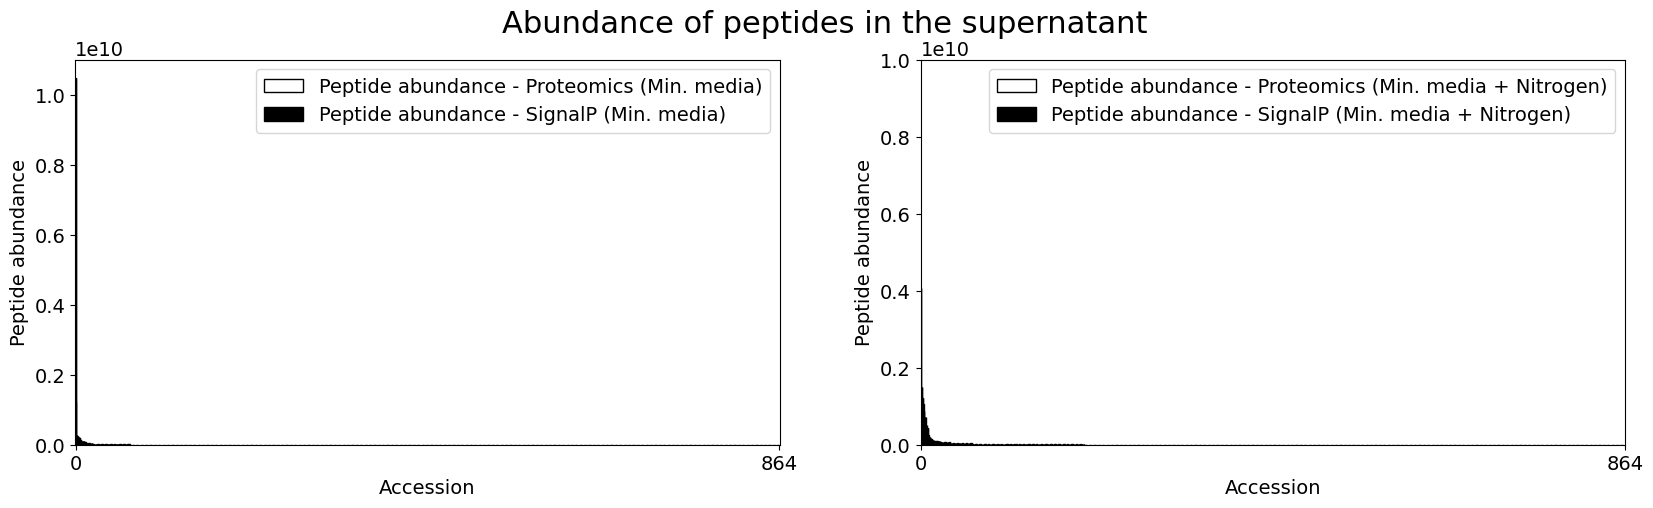

In [26]:
# Set the font size before creating any plot elements
plt.rc('font', size=14)

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Abundance of peptides in the supernatant', fontsize=22)

# Plot the first plot in the left subplot
df_peptide_count_merged_MM.plot(x='Accession', y=['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)'], kind='bar', color=['none', 'black'], edgecolor='black', ax=axs[0])
axs[0].set_xlabel('Accession')
axs[0].set_ylabel('Peptide abundance')
axs[0].set_xticks([0, df_peptide_count_merged_MM.index.get_loc(df_peptide_count_merged_MM.index[-1])])
axs[0].set_xticklabels([0, df_peptide_count_merged_MM.index.get_loc(df_peptide_count_merged_MM.index[-1])], rotation=0)

# Plot the second plot in the right subplot
df_peptide_count_merged_MM_N.plot(x='Accession', y=['Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)'], kind='bar', color=['none', 'black'], edgecolor='black', ax=axs[1])
axs[1].set_ylim(0, 1e10)
axs[1].set_xlabel('Accession')
axs[1].set_ylabel('Peptide abundance')
axs[1].set_xticks([0, df_peptide_count_merged_MM_N.index.get_loc(df_peptide_count_merged_MM_N.index[-1])])
axs[1].set_xticklabels([0, df_peptide_count_merged_MM_N.index.get_loc(df_peptide_count_merged_MM_N.index[-1])], rotation=0)

plt.show()

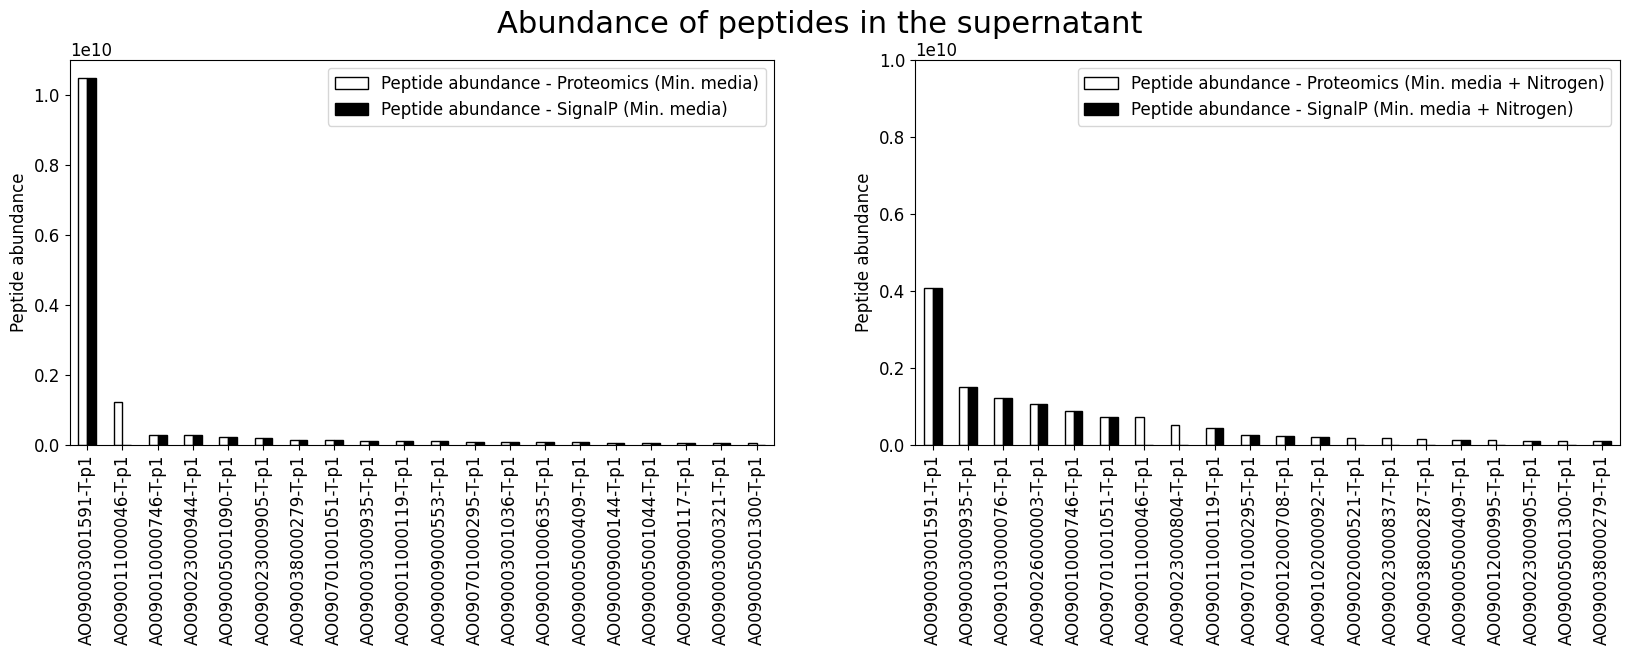

In [27]:
# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Abundance of peptides in the supernatant', fontsize=22)

# Select first 20 rows of each dataframe
df_top20_MM = df_peptide_count_merged_MM.iloc[:20]
df_top20_MM_N = df_peptide_count_merged_MM_N.iloc[:20]

# Plot the first plot in the left subplot
df_top20_MM.plot(x='Accession', y=['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)'], kind='bar', color=['none', 'black'], edgecolor='black', ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('Peptide abundance')

# Plot the second plot in the right subplot
df_top20_MM_N.plot(x='Accession', y=['Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)'], kind='bar', color=['none', 'black'], edgecolor='black', ax=axs[1])
axs[1].set_ylim(0, 1e10)
axs[1].set_xlabel('')
axs[1].set_ylabel('Peptide abundance')

plt.show()

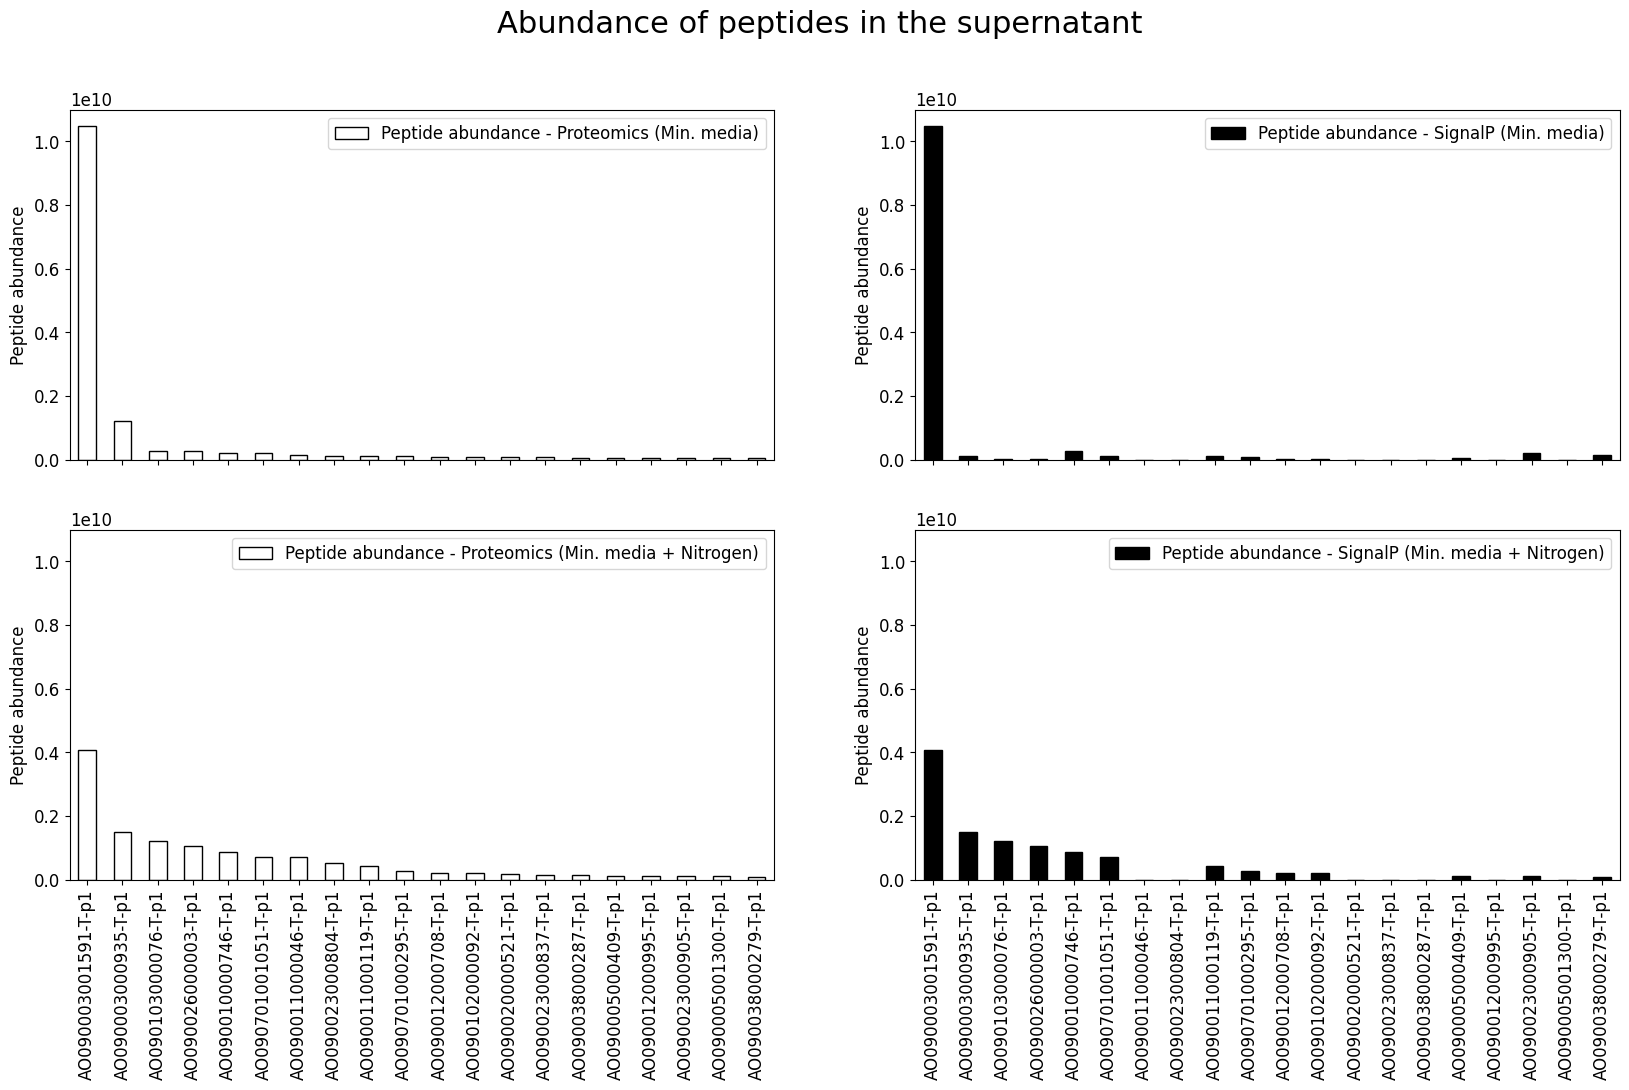

In [28]:
# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Abundance of peptides in the supernatant', fontsize=22)

# Select first 20 rows of each dataframe
df_top20_MM = df_peptide_count_merged_MM.iloc[:20]
df_top20_MM_N = df_peptide_count_merged_MM_N.iloc[:20]

# Plot the first plot in the left subplot
df_top20_MM.plot(x='Accession', y='Peptide abundance - Proteomics (Min. media)', kind='bar', color='none', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Peptide abundance')
axs[0, 0].set_xticklabels([])

# Plot the second plot in the right subplot
df_top20_MM_N.plot(x='Accession', y='Peptide abundance - SignalP (Min. media)', kind='bar', color='black', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_ylim(0, 1.1e10)
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Peptide abundance')
axs[0, 1].set_xticklabels([])

# Plot the second plot in the right subplot
df_top20_MM_N.plot(x='Accession', y='Peptide abundance - Proteomics (Min. media + Nitrogen)', kind='bar', color='none', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_ylim(0, 1.1e10)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Peptide abundance')

# Plot the second plot in the right subplot
df_top20_MM_N.plot(x='Accession', y='Peptide abundance - SignalP (Min. media + Nitrogen)', kind='bar', color='black', edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_ylim(0, 1.1e10)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Peptide abundance')

plt.show()